In [44]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [45]:
dow_table = 'Output/day_of_week_table.csv'
total_table = 'Output/game_status_table.csv'
gameday_table = 'Output/gameday_table.csv'
month_year = 'Output/month_year_crime.csv'
crime_count = 'Output/total_daily_crime_count.csv'
blazer_data ='Output/trail_blazers.csv'

In [46]:
# The correct encoding must be used to read the CSV in pandas
dow_table_df = pd.read_csv(dow_table, encoding="ISO-8859-1")
total_table_df = pd.read_csv(total_table, encoding="ISO-8859-1")
gameday_table_df = pd.read_csv(gameday_table, encoding="ISO-8859-1")
month_year_df = pd.read_csv(month_year, encoding="ISO-8859-1")
crime_count_df = pd.read_csv(crime_count, encoding="ISO-8859-1")
blazer_data_df = pd.read_csv(blazer_data, encoding="ISO-8859-1")

## ANOVA Test

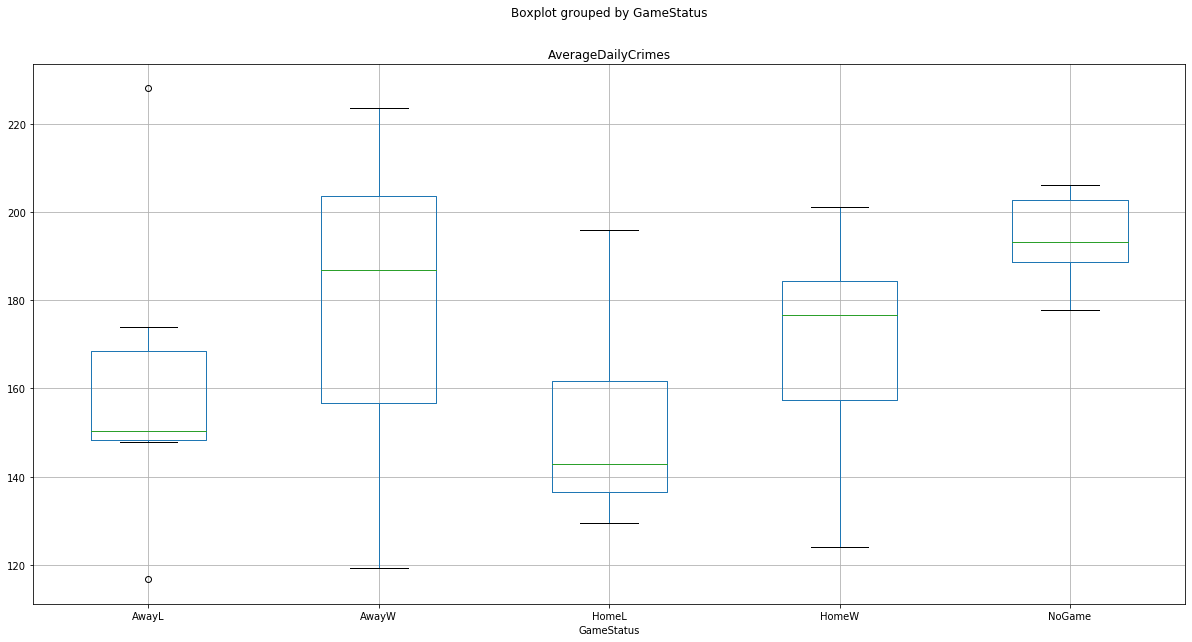

In [56]:
# Group Game-Day Data
dow_table_df.boxplot("AverageDailyCrimes", by="GameStatus", figsize=(20, 10))

# Save the figure
plt.savefig("Output/anova.png")

In [48]:
# Extract individual groups
group1 = dow_table_df[dow_table_df["GameStatus"] == "AwayL"]["AverageDailyCrimes"]
group2 = dow_table_df[dow_table_df["GameStatus"] == "AwayW"]["AverageDailyCrimes"]
group3 = dow_table_df[dow_table_df["GameStatus"] == "HomeL"]["AverageDailyCrimes"]
group4 = dow_table_df[dow_table_df["GameStatus"] == "HomeW"]["AverageDailyCrimes"]
group5 = dow_table_df[dow_table_df["GameStatus"] == "NoGame"]["AverageDailyCrimes"]

In [49]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=2.2234754003444084, pvalue=0.09015836639942378)

## Independent TTest Game Days vs No Game

In [50]:
gameday_table_df.head()

,Unnamed: 0,Date,Num_times,HasGame,Month_Year
0,0,2015-05-12,161,False,2015-05
1,1,2015-05-01,196,False,2015-05
2,2,2015-05-02,176,False,2015-05
3,3,2015-05-03,130,False,2015-05
4,4,2015-05-04,143,False,2015-05


In [51]:
population1 = gameday_table_df[gameday_table_df["HasGame"] == True]
population1.Num_times.mean()

164.01700680272108

In [52]:
population2 = gameday_table_df[gameday_table_df["HasGame"] == False]
population2.Num_times.mean()

194.0678111587983

In [53]:
stats.ttest_ind(population1.Num_times, population2.Num_times, equal_var=False)

Ttest_indResult(statistic=-4.813279488503946, pvalue=2.0575113166935215e-06)

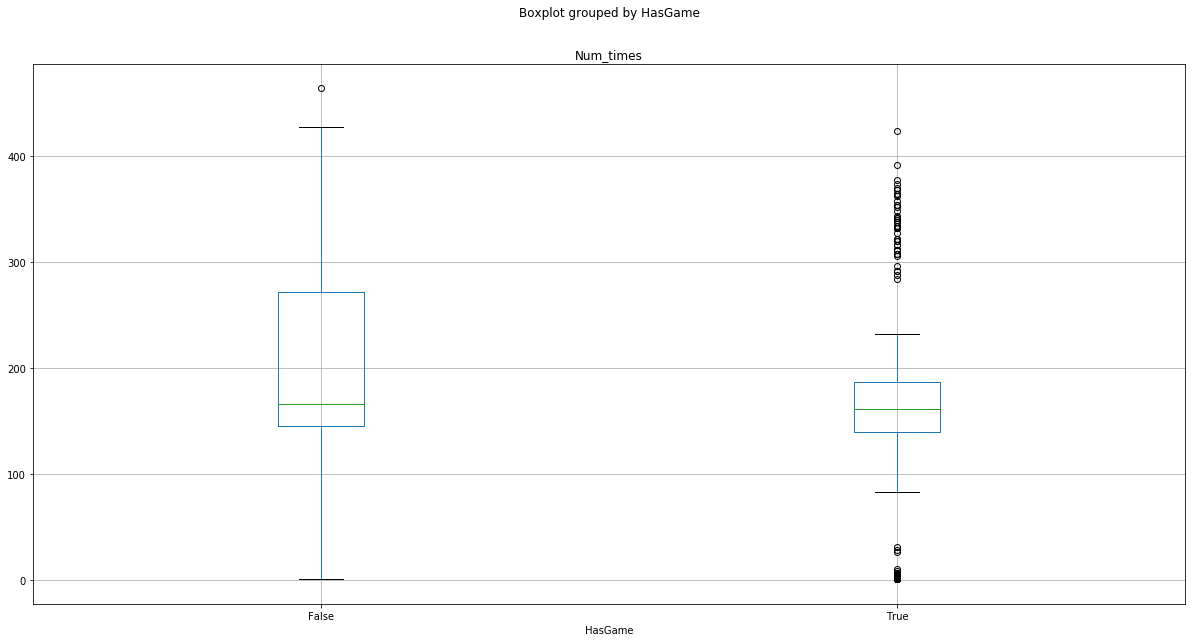

In [55]:
gameday_table_df.boxplot("Num_times", by="HasGame", figsize=(20, 10))

# Save the figure
plt.savefig("Output/ttest.png")